In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [3]:
assembly = 'GCA_000381985.1'
p = os.path.join(
    os.getcwd(),
    f'data/sequences/{assembly}/{assembly}_tri_nucleotide_distance_to_mean.csv',
)
df = pd.read_csv(p)
df.head()

,protein_id,distance
0,KB907337.1_1,0.072647
1,KB907337.1_2,0.082018
2,KB907337.1_3,0.148301
3,KB907337.1_4,0.126539
4,KB907337.1_5,0.167576


In [4]:
df.sort_values('distance').head()

,protein_id,distance
3036,KB907348.1_12,0.031420
231,KB907337.1_232,0.034359
3124,KB907348.1_100,0.036779
2121,KB907342.1_149,0.037492
1887,KB907341.1_172,0.037527


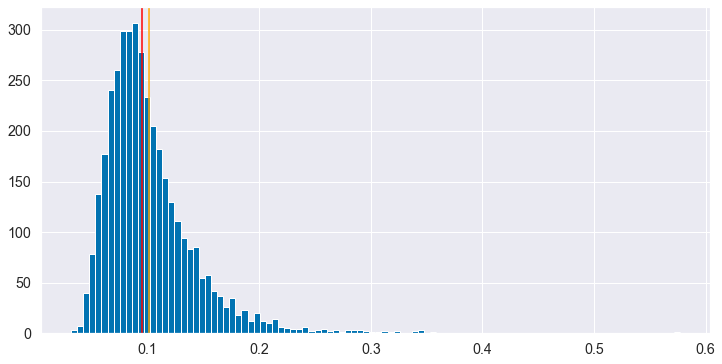

In [5]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
df['distance'].hist(ax=ax, bins=100);
ax.axvline(np.mean(df['distance'].values), color='orange');
ax.axvline(np.exp(np.mean(np.log(df['distance'].values))), color='red');

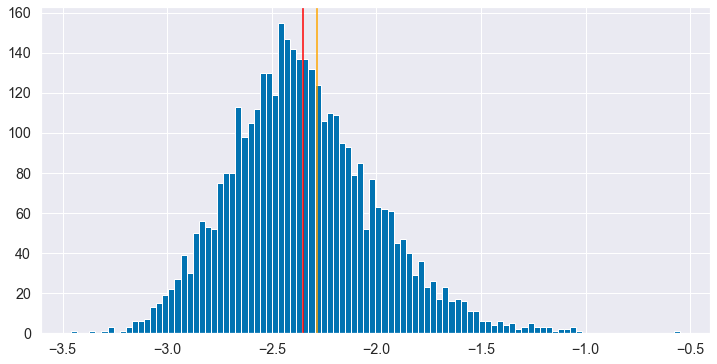

In [6]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(np.log(df['distance'].values), bins=100);
ax.axvline(np.log(np.mean(df['distance'].values)), color='orange');
ax.axvline(np.mean(np.log(df['distance'].values)), color='red');

## Assembly domain probabilities

In [31]:
accession = 'GCA_001994995.1'
domain_path = os.path.join(os.getcwd(), f'data/sequences/{accession}/{accession}_pfam_probability_left.csv')
domain_df = pd.read_csv(domain_path)
print(domain_path)
domain_df.head(20)

/Users/srom/workspace/nbias/data/sequences/GCA_001994995.1/GCA_001994995.1_pfam_probability_left.csv


,id,query,log_probability,log_probability_random,n_elements,evidence,evidence_strength
0,PF00990,GGDEF,-14.068408,-18.786727,37,2.049140,Decisive
1,PF00005,ABC_tran,-25.523487,-29.957213,59,1.925543,Very Strong
2,PF02518,HATPase_c,-17.194721,-21.325474,42,1.793963,Very Strong
3,PF00271,Helicase_C,-7.123115,-11.170486,22,1.757751,Very Strong
4,PF00563,EAL,-7.139973,-10.154987,20,1.309404,Strong
5,PF00672,HAMP,-11.347822,-14.216982,28,1.246061,Strong
6,PF04851,ResIII,-4.414631,-7.108491,14,1.169929,Strong
7,PF13304,AAA_21,-15.114038,-17.771228,35,1.154003,Strong
8,PF01966,HD,-8.620181,-11.170486,22,1.107583,Strong
9,PF00512,HisKA,-10.687864,-13.201484,26,1.091651,Strong


In [53]:
i = 4
np.log10((0.9**i) / (0.6**i))

0.704365036222725

In [56]:
v = np.exp((1/37) * np.array([-14.068408, -18.786727]))
v

array([0.68370602, 0.60184859])

In [57]:
np.log10(v[0]) - np.log10(v[1])

0.05538215960970999

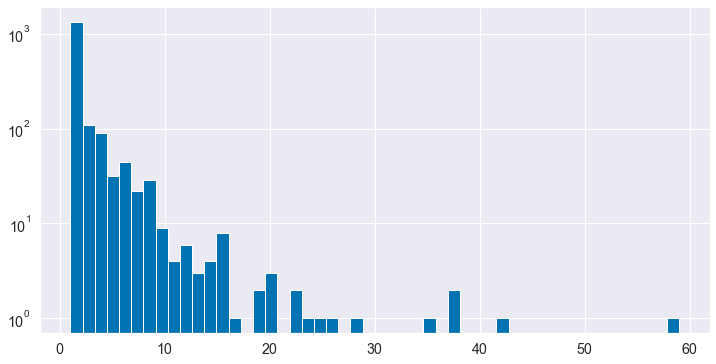

In [29]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(domain_df['n_elements'].values, bins=50, log=True);

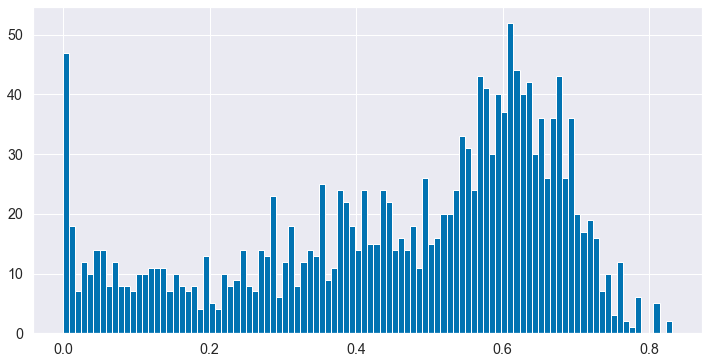

In [40]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(np.exp(domain_df['log_probability'].values), bins=100);

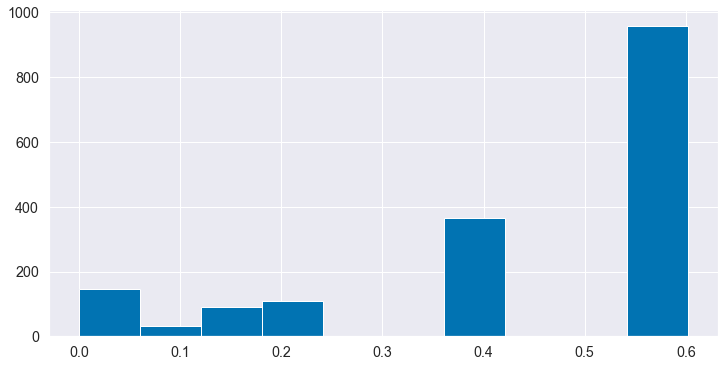

In [42]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(np.exp(domain_df['log_probability_random'].values), bins=10);

## Phylum domain probabilities

In [39]:
phylum = 'euryarchaeota'
phylum_path = os.path.join(os.getcwd(), f'data/phylum/{phylum}/{phylum}_pfam_probability_left.csv')
phylum_df = pd.read_csv(phylum_path)
phylum_df.head(20)

,id,query,log_probability,log_probability_random,n_elements,evidence,evidence_strength
0,PF07428,Tri3,-7.130448,-7.531113,1,0.174006,Weak
1,PF08811,DUF1800,-7.225100,-7.593856,1,0.160149,Weak
2,PF02983,Pro_Al_protease,-7.260810,-7.605768,1,0.149813,Weak
3,PF04992,RNA_pol_Rpb1_6,-6.486819,-6.824402,2,0.146611,Weak
4,PF04990,RNA_pol_Rpb1_7,-6.486819,-6.824402,2,0.146611,Weak
5,PF12684,DUF3799,-6.451696,-6.772559,2,0.139349,Weak
6,PF14459,Prok-E2_C,-7.162025,-7.478725,1,0.137541,Weak
7,PF04620,FlaA,-7.216843,-7.532259,1,0.136983,Weak
8,PF07881,Fucose_iso_N1,-6.534429,-6.837265,2,0.131520,Weak
9,PF07882,Fucose_iso_N2,-6.534429,-6.837265,2,0.131520,Weak


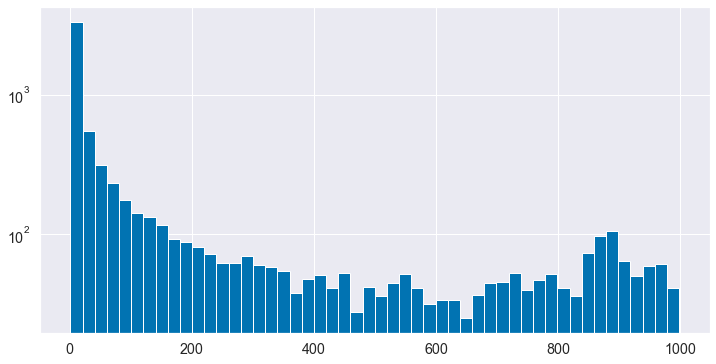

In [27]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(phylum_df['n_elements'].values, bins=50, log=True);